<a href="https://colab.research.google.com/github/selesselvan/master-thesis/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loader

In [1]:
# !pip install seaborn
# !pip install --upgrade scikit-learn
# !pip install statsmodels

In [2]:
import os
import chardet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [4]:
# base path = './'

base_path = '/content/drive/MyDrive/Colab Notebooks/Thesis_code/'
file_name = 'retail_price.csv'
file_path = base_path + file_name

In [5]:
file_path

'/content/drive/MyDrive/Colab Notebooks/Thesis_code/retail_price.csv'

In [6]:
# Function to find encoding
import chardet


def get_file_encoding(file_name):
  with open(file=file_name, mode ='rb') as inp:
    encoding=chardet.detect(inp.read(10000))['encoding']
    return encoding

In [7]:
df = pd.read_csv(file_path, sep=',', encoding=get_file_encoding(file_path))

In [8]:
df.shape

(676, 27)

In [9]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,2017,10.267394,3800,89.9,3.9,15.011897,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,2017,6.503115,3800,89.9,3.9,14.769216,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,2017,12.071651,3800,89.9,3.9,13.993833,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,2017,9.293873,3800,89.9,3.9,14.656757,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,2017,5.555556,3800,89.9,3.9,18.776522,45.95,4.0,15.100000,45.95


In [10]:
# List the variables

df.dtypes

,0
product_id,object
product_category_name,object
month_year,object
qty,int64
total_price,float64
freight_price,float64
unit_price,float64
product_name_lenght,int64
product_description_lenght,int64
product_photos_qty,int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [12]:
df.isnull().sum()

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [13]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'lag_price'],
      dtype='object')

In [14]:
df.groupby('product_category_name').count()

,product_id,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,lag_price
product_category_name,,,,,,,,,,,,,,,,,,,,,
bed_bath_table,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
computers_accessories,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
consoles_games,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
cool_stuff,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
furniture_decor,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
garden_tools,160,160,160,160,160,160,160,160,160,160,...,160,160,160,160,160,160,160,160,160,160
health_beauty,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
perfumery,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
watches_gifts,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


# Outlier

In [17]:
data = df['unit_price']

# Calculate statistics
mean = np.mean(data)
median = np.median(data)
variance = np.var(data)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Mean: 106.49679980991124
Median: 89.9
Variance: 5795.259609212066
Skewness: 1.7748040436355066
Kurtosis: 3.0501094134033107


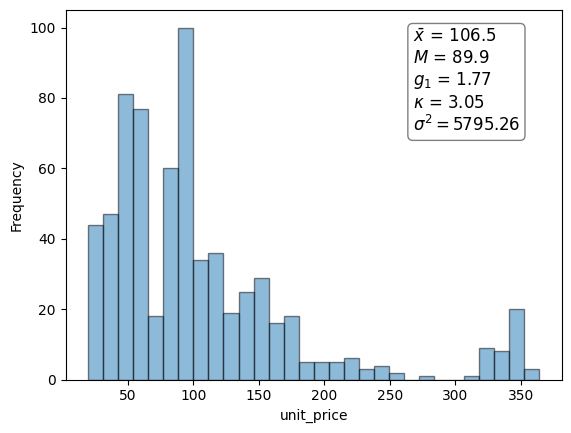

In [18]:
# Before outlier removal

# Plotting the histogram
plt.hist(data, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('unit_price')
plt.ylabel('Frequency')

textstr = '\n'.join((
    r'$\bar x$ = ' + str(round(mean, 2)),
    r'$M$ = ' + str(round(median, 2)),
    r'$g_1$ = ' + str(round(skewness, 2)),
    r'$\kappa$ = ' + str(round(kurtosis, 2)),
    r'$\sigma^2 = $' + str(round(variance, 2))
    ))

# These are the text box properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Place the text box in the plot (loc: lower left, upper left, etc.)
plt.text(0.7, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# plt.show()
plt.savefig("hist-distribution.pdf", format="pdf", bbox_inches="tight")

In [19]:
# Function to calculate outliers based on a given multiplier
def calculate_iqr_outliers(data, multiplier=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return data[(data < lower_bound) | (data > upper_bound)], lower_bound, upper_bound

# Example: Testing different multipliers
for multiplier in [1.5, 1.75, 2.0]:
    outliers, lower, upper = calculate_iqr_outliers(data, multiplier)
    print(f"Multiplier: {multiplier}, Number of Outliers: {len(outliers)}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}\n")

# outliers, lower, upper = calculate_iqr_outliers(data, 1.75)
# outliers

Multiplier: 1.5, Number of Outliers: 45
Lower Bound: -60.23500000000001, Upper Bound: 244.125

Multiplier: 1.75, Number of Outliers: 42
Lower Bound: -79.2575, Upper Bound: 263.14750000000004

Multiplier: 2.0, Number of Outliers: 41
Lower Bound: -98.28, Upper Bound: 282.17



In [20]:
from scipy.stats import median_abs_deviation

median = np.median(data)
mad = median_abs_deviation(data)

# Modified Z-score
modified_z_scores = 0.6745 * (data - median) / mad

# Define threshold, typically 3.5
threshold = 3.5

# Filter out outliers
filtered_data = data[np.abs(modified_z_scores) >= threshold]
filtered_data.shape

(42,)

In [21]:
# After outlier removal

import scipy.stats as stats
import numpy as np

data = data[np.abs(modified_z_scores) < threshold]

# Calculate statistics
mean = np.mean(data)
median = np.median(data)
variance = np.var(data)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 91.05992552697161
Median: 85.0175
Variance: 2326.8698699084794
Skewness: 0.860852152320777
Kurtosis: 0.45343455858162773


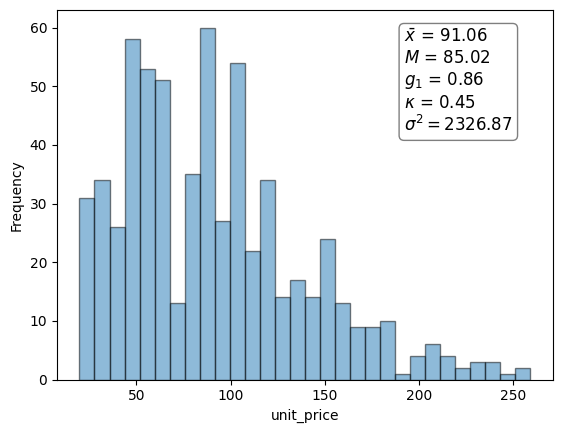

In [22]:
# After outlier removal

import matplotlib.pyplot as plt

# Example data
data = data[np.abs(modified_z_scores) < threshold]

# Plotting the histogram
plt.hist(data, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('unit_price')
plt.ylabel('Frequency')

textstr = '\n'.join((
    r'$\bar x$ = ' + str(round(mean, 2)),
    r'$M$ = ' + str(round(median, 2)),
    r'$g_1$ = ' + str(round(skewness, 2)),
    r'$\kappa$ = ' + str(round(kurtosis, 2)),
    r'$\sigma^2 = $' + str(round(variance, 2))
    ))

# These are the text box properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Place the text box in the plot (loc: lower left, upper left, etc.)
plt.text(0.7, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# plt.show()
plt.savefig("hist-distribution-after.pdf", format="pdf", bbox_inches="tight")

In [23]:
df['modified_z_scores'] = modified_z_scores
df = df[np.abs(df['modified_z_scores']) < threshold]
df.drop('modified_z_scores', axis=1, inplace=True)
df.shape

<ipython-input-23-c54049ab47a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('modified_z_scores', axis=1, inplace=True)


(634, 27)

# Feature Selection and Pre-processing

In [24]:
removed_columns = ['month_year', 'total_price', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'weekday', 'month', 'year']

selected_columns = ['product_id', 'product_category_name', 'qty', 'freight_price', 'unit_price',  'product_weight_g', 'product_score',
                    'customers', 'weekend', 'holiday', 's', 'volume', 'comp_1', 'ps1', 'fp1',  'comp_2', 'ps2', 'fp2', 'lag_price']

numerical_features = ['qty', 'freight_price', 'product_weight_g', 'product_score',
                    'customers', 'weekend', 'holiday', 's', 'volume', 'comp_1', 'ps1', 'fp1',  'comp_2', 'ps2', 'fp2', 'lag_price']

categorical_features = ['product_category_name']

target_column = ['unit_price']

In [25]:
df = df[selected_columns]
# df['product_category_name'] = df.product_category_name.astype('category')
df.columns

Index(['product_id', 'product_category_name', 'qty', 'freight_price',
       'unit_price', 'product_weight_g', 'product_score', 'customers',
       'weekend', 'holiday', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2',
       'ps2', 'fp2', 'lag_price'],
      dtype='object')

In [26]:
def label_extremeness(x):
    avg = (x[12] + x[15])/2
    avg = avg - avg * 0.05
    return round(avg, 2)

df['traditional_price'] = df.apply(label_extremeness, axis=1)
# df[['comp_1', 'comp_2', 'traditional_price']]

<ipython-input-26-accac955b3bf>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg = (x[12] + x[15])/2
<ipython-input-26-accac955b3bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traditional_price'] = df.apply(label_extremeness, axis=1)


In [27]:
# X, y = df.drop(['product_id', 'unit_price'], axis=1), df['unit_price']
X, y = df.drop(['unit_price'], axis=1), df['unit_price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.10, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((570, 19), (64, 19), (570,), (64,))

# Feature Graphs

<ipython-input-29-e879f58ce579>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-29-e879f58ce579>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-29-e879f58ce579>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

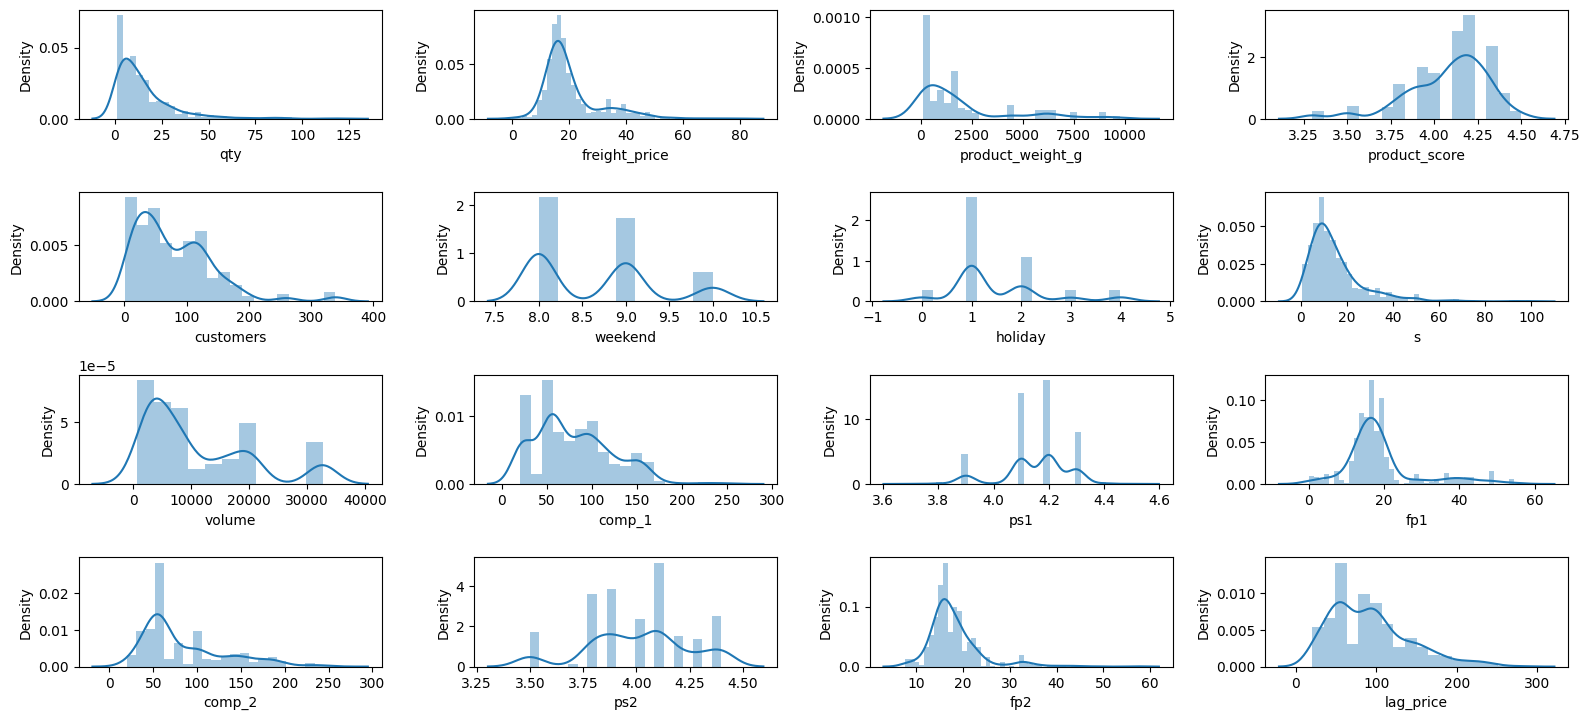

In [29]:
k=1
plt.figure(figsize=(16,16))

for i in df[numerical_features]:
    plt.subplot(9,4,k)
    sns.distplot(df[i])
    # plt.title(i)
    k+=1
    plt.tight_layout()


plt.savefig("density_curves.pdf", format="pdf", bbox_inches="tight")

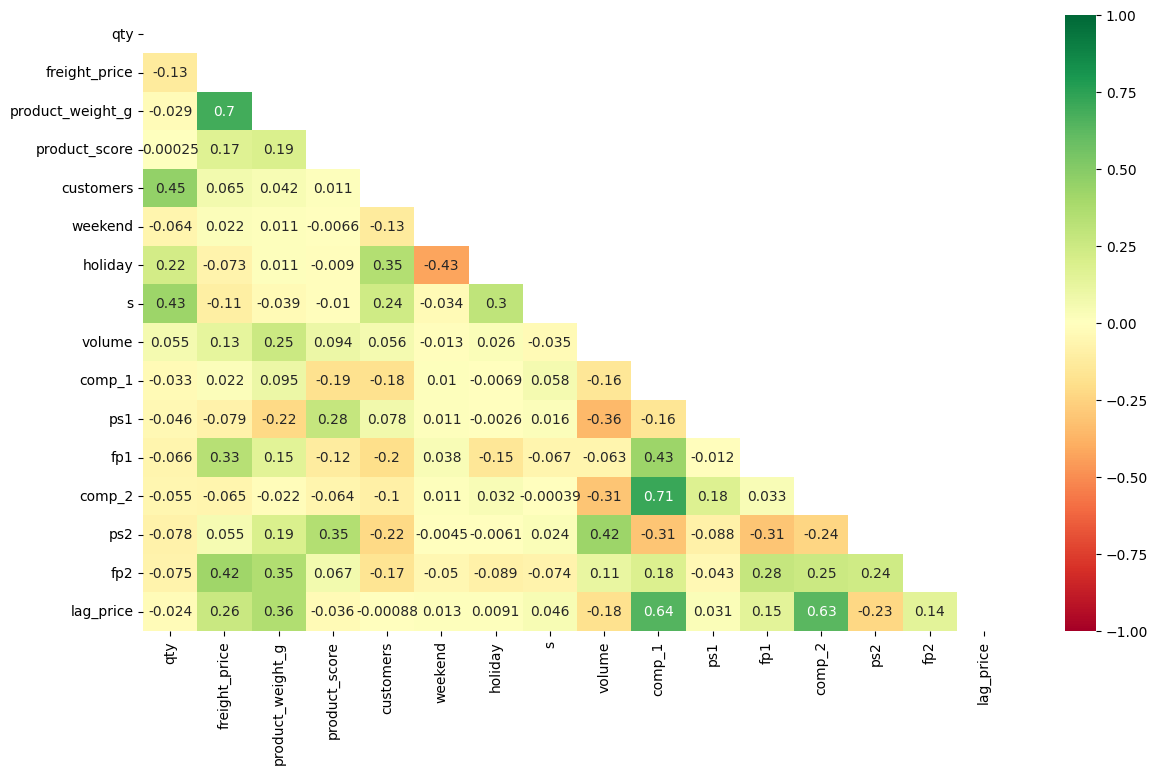

In [30]:
plt.figure(figsize=(14, 8))
mask = np.triu(np.ones_like(X_train[numerical_features].corr(), dtype=bool))
heatmap = sns.heatmap(X_train[numerical_features].corr(method='pearson', numeric_only = True), annot=True, mask=mask, vmin=-1, vmax=1, cmap ='RdYlGn')
fig = heatmap.get_figure()
fig.savefig("pearson_heatmap.pdf", format="pdf")

In [31]:
# Load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the vif for all given features
def compute_vif(df, considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = list(numerical_features)
#considered_features.remove('comp_1')
# considered_features.remove('comp_2')

# compute vif
compute_vif(X_train[considered_features], considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
9,comp_1,5.297126
12,comp_2,4.528576
15,lag_price,2.814719
1,freight_price,2.735292
11,fp1,2.670747
2,product_weight_g,2.588814
13,ps2,2.168478
14,fp2,1.880297
10,ps1,1.828791
4,customers,1.825797


In [32]:
# Load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the vif for all given features
def compute_vif(df, considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = list(numerical_features)
considered_features.remove('comp_1')
# considered_features.remove('comp_2')

# compute vif
compute_vif(X_train[considered_features], considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
1,freight_price,2.622786
2,product_weight_g,2.587764
11,comp_2,2.571513
14,lag_price,2.462761
12,ps2,2.167859
13,fp2,1.833544
4,customers,1.822166
10,fp1,1.625335
8,volume,1.554752
0,qty,1.549311


In [33]:
numerical_features.remove('comp_1')

In [34]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)


label_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),   # Apply StandardScaler to numerical features
        ('cat', LabelEncoder(), categorical_features)   # Apply OneHotEncoder to categorical features
    ]
)

hot_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),   # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(), categorical_features)   # Apply OneHotEncoder to categorical features
    ]
)

# Linear Regression

In [35]:
lin_reg = Pipeline(
    steps=[
        ("preprocessor", hot_preprocessor),
        ("regressor", LinearRegression())
        ]
)

lin_reg.fit(X_train.loc[:, (X_train.columns != 'traditional_price') & (X_train.columns != 'product_id') & (X_train.columns != 'comp_1')], pd.DataFrame(y_train, columns=['unit_price']))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['qty', 'freight_price',
                                                   'product_weight_g',
                                                   'product_score', 'customers',
                                                   'weekend', 'holiday', 's',
                                                   'volume', 'ps1', 'fp1',
                                                   'comp_2', 'ps2', 'fp2',
                                                   'lag_price']),
                                                 ('cat', OneHotEncoder(),
                                                  ['product_category_name'])])),
                ('regressor', LinearRegression())])

In [36]:
print(lin_reg.score(X_train.loc[:, (X_train.columns != 'traditional_price') & (X_train.columns != 'product_id') & (X_train.columns != 'comp_1')], pd.DataFrame(y_train, columns=['unit_price'])))
# print(lin_reg.get_params)

0.9764365264175501


In [37]:
lin_y_pred = lin_reg.predict(X_test)
print(f"R2 score: {r2_score(y_test, lin_y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, lin_y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, lin_y_pred)}")

R2 score: 0.9840694571707528
Mean Absolute Error: 4.178018273029679
Root Mean Squared Error: 6.159309224740218


# Random Forest

In [38]:
rf_reg = Pipeline(
    steps=[
        ("preprocessor", hot_preprocessor),
        ("regressor", RandomForestRegressor())
        ]
)

rf_param_grid = {
    "regressor__criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "regressor__max_depth": [i for i in range (2, 5)],
    "regressor__min_samples_split": [i for i in range (2, 5)],
    "regressor__min_samples_leaf": [i for i in range (2, 5)],
    "regressor__max_features": ["sqrt", "log2", None]
}

print(f'Total number of fits that will be tested for RF: {len(ParameterGrid(rf_param_grid))}')

rf_grid_search = GridSearchCV(rf_reg, param_grid=rf_param_grid, cv=5, verbose=2)

rf_grid_search.fit(X_train.loc[:, (X_train.columns != 'traditional_price') & (X_train.columns != 'product_id') & (X_train.columns != 'comp_1')], pd.DataFrame(y_train, columns=['unit_price']).values.ravel())

rf_estimator = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

Total number of fits that will be tested for RF: 324
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2; total time=   0.2s
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2; total time=   0.2s
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2; total time=   0.2s
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2; total time=   0.2s
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [39]:
print(rf_grid_search.best_score_)
print(rf_grid_search.best_params_)

0.9711478774232344
{'regressor__criterion': 'squared_error', 'regressor__max_depth': 4, 'regressor__max_features': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 3}


In [40]:
rf_y_pred = rf_estimator.predict(X_test)
print(f"R2 score: {r2_score(y_test, rf_y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, rf_y_pred)}")

R2 score: 0.984639559502787
Mean Absolute Error: 3.9482693990821183
Root Mean Squared Error: 6.048094329394036


# Decision Tree

In [41]:
dt_reg = Pipeline(
    steps=[
        ("preprocessor", hot_preprocessor),
        ("regressor", DecisionTreeRegressor())
        ]
)

dt_param_grid = {
    "regressor__criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "regressor__max_depth": [i for i in range (2, 5)],
    "regressor__min_samples_split": [i for i in range (2, 5)],
    "regressor__min_samples_leaf": [i for i in range (2, 5)],
    "regressor__max_features": ["sqrt", "log2", None]
}

print(f'Total number of fits that will be tested for DT: {len(ParameterGrid(dt_param_grid))}')

dt_grid_search = GridSearchCV(dt_reg, param_grid=dt_param_grid, cv=5, verbose=2)

dt_grid_search.fit(X_train.loc[:, (X_train.columns != 'traditional_price') & (X_train.columns != 'product_id') & (X_train.columns != 'comp_1')], pd.DataFrame(y_train, columns=['unit_price']).values.ravel())

dt_estimator = dt_grid_search.best_estimator_
dt_best_params = dt_grid_search.best_params_

Total number of fits that will be tested for DT: 324
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor__criterion=squared_error, regressor__max_depth=2, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [42]:
print(dt_grid_search.best_score_)
print(dt_grid_search.best_params_)

0.9618824369680228
{'regressor__criterion': 'squared_error', 'regressor__max_depth': 4, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}


In [43]:
dt_y_pred = dt_estimator.predict(X_test.loc[:, (X_train.columns != 'traditional_price') & (X_train.columns != 'product_id') & (X_train.columns != 'comp_1')])
print(f"R2 score: {r2_score(y_test, dt_y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, dt_y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, dt_y_pred)}")

R2 score: 0.9783573594113412
Mean Absolute Error: 5.109220151071824
Root Mean Squared Error: 7.179130445167294


# Support Vector Regressor

In [44]:
# @title
svr_reg = Pipeline(
    steps=[
        ("preprocessor", hot_preprocessor),
        ("regressor", SVR())
        ]
)

svr_param_grid = {
    "regressor__kernel": ["linear", "poly", "rbf", "sigmoid"],
    "regressor__degree": [i for i in range (2, 5)],
    'regressor__C': [0.1, 1, 10],
    'regressor__gamma': [0.1, 0.01, 0.001],
}

print(f'Total number of fits that will be tested for SVR: {len(ParameterGrid(svr_param_grid))}')

svr_grid_search = GridSearchCV(svr_reg, param_grid=svr_param_grid, cv=5, verbose=2)

svr_grid_search.fit(X_train.loc[:, (X_train.columns != 'traditional_price') & (X_train.columns != 'product_id') & (X_train.columns != 'comp_1')], pd.DataFrame(y_train, columns=['unit_price']).values.ravel())

svr_estimator = svr_grid_search.best_estimator_
svr_best_params = svr_grid_search.best_params_

Total number of fits that will be tested for SVR: 108
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END regressor__C=0.1, regressor__degree=2, regressor__gamma=0.1, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__degree=2, regressor__gamma=0.1, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__degree=2, regressor__gamma=0.1, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__degree=2, regressor__gamma=0.1, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__degree=2, regressor__gamma=0.1, regressor__kernel=linear; total time=   0.0s
[CV] END regressor__C=0.1, regressor__degree=2, regressor__gamma=0.1, regressor__kernel=poly; total time=   0.0s
[CV] END regressor__C=0.1, regressor__degree=2, regressor__gamma=0.1, regressor__kernel=poly; total time=   0.0s
[CV] END regressor__C=0.1, regressor__degree=2, regressor__gamma=0.1, regressor__k

In [45]:
print(svr_grid_search.best_score_)
print(svr_grid_search.best_params_)

0.9731850725212757
{'regressor__C': 1, 'regressor__degree': 2, 'regressor__gamma': 0.1, 'regressor__kernel': 'linear'}


In [46]:
svr_y_pred = svr_estimator.predict(X_test.loc[:, (X_train.columns != 'traditional_price') & (X_train.columns != 'product_id') & (X_train.columns != 'comp_1')])
print(f"R2 score: {r2_score(y_test, svr_y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, svr_y_pred)}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, svr_y_pred)}")

R2 score: 0.9862203720589975
Mean Absolute Error: 3.1745202492719082
Root Mean Squared Error: 5.728428102541136


# Profitability

In [47]:
X_test['lin_y_pred'] = lin_y_pred
X_test['dt_y_pred'] = dt_y_pred
X_test['rf_y_pred'] = rf_y_pred
X_test['svr_y_pred'] = svr_y_pred
X_test['unit_price'] = y_test

In [48]:
X_test.to_csv(base_path + '/full_retail_price.csv', sep=',', encoding='utf-8', index=None)

In [49]:
full_df = pd.read_csv(base_path + '/full_retail_price.csv', sep=',', encoding='utf-8')
full_df.head()

,product_id,product_category_name,qty,freight_price,product_weight_g,product_score,customers,weekend,holiday,s,...,comp_2,ps2,fp2,lag_price,traditional_price,lin_y_pred,dt_y_pred,rf_y_pred,svr_y_pred,unit_price
0,garden9,garden_tools,19,16.030526,1500,4.0,74,10,1,7.261024,...,59.9,4.1,15.392308,59.9,56.91,60.865694,59.399549,59.771208,59.940831,59.9
1,garden7,garden_tools,3,21.350000,1800,4.2,116,9,1,5.263158,...,53.9,4.1,19.024231,51.4,51.20,52.282051,50.296282,50.500298,51.493807,53.9
2,garden2,garden_tools,5,22.420000,1850,4.3,58,9,0,12.843851,...,49.9,4.1,22.878667,49.9,47.41,50.188743,50.296282,50.500298,50.057302,49.9
3,garden6,garden_tools,14,16.626429,1550,4.1,74,10,1,3.978540,...,59.9,4.1,15.392308,59.9,56.91,61.379409,59.399549,59.771208,59.957584,59.9
4,garden2,garden_tools,15,17.878667,1850,4.3,74,10,1,13.531553,...,59.9,4.1,15.392308,59.9,56.91,60.837805,59.399549,59.771208,60.053134,59.9


In [50]:
imp_columns = ['product_id', 'product_category_name', 'qty', 'traditional_price', 'lin_y_pred', 'dt_y_pred', 'rf_y_pred', 'svr_y_pred', 'unit_price']
reduced_df = full_df[imp_columns]
reduced_df

,product_id,product_category_name,qty,traditional_price,lin_y_pred,dt_y_pred,rf_y_pred,svr_y_pred,unit_price
0,garden9,garden_tools,19,56.91,60.865694,59.399549,59.771208,59.940831,59.90
1,garden7,garden_tools,3,51.20,52.282051,50.296282,50.500298,51.493807,53.90
2,garden2,garden_tools,5,47.41,50.188743,50.296282,50.500298,50.057302,49.90
3,garden6,garden_tools,14,56.91,61.379409,59.399549,59.771208,59.957584,59.90
4,garden2,garden_tools,15,56.91,60.837805,59.399549,59.771208,60.053134,59.90
...,...,...,...,...,...,...,...,...,...
59,computers6,computers_accessories,69,108.16,140.348957,144.446113,147.696664,148.450327,149.90
60,health7,health_beauty,11,56.04,61.086918,59.399549,59.771208,59.090295,58.99
61,bed5,bed_bath_table,10,64.53,208.469169,231.319600,208.788902,211.782808,209.00
62,computers1,computers_accessories,6,123.45,98.230474,91.573886,96.860110,98.852602,98.90


In [51]:
total_original_price = reduced_df.eval('total_original_price = qty * unit_price').groupby('product_id')['total_original_price'].sum().reset_index()
total_traditional_price = reduced_df.eval('total_traditional_price = qty * traditional_price').groupby('product_id')['total_traditional_price'].sum().reset_index()
total_lin_price = reduced_df.eval('total_lin_price = qty * lin_y_pred').groupby('product_id')['total_lin_price'].sum().reset_index()
total_dt_price = reduced_df.eval('total_dt_price = qty * dt_y_pred').groupby('product_id')['total_dt_price'].sum().reset_index()
total_rf_price = reduced_df.eval('total_rf_price = qty * rf_y_pred').groupby('product_id')['total_rf_price'].sum().reset_index()
total_svr_price = reduced_df.eval('total_svr_price = qty * svr_y_pred').groupby('product_id')['total_svr_price'].sum().reset_index()

In [52]:
total_traditional_price['total_original_price'] = total_original_price['total_original_price']
total_traditional_price['total_lin_price'] = total_lin_price['total_lin_price']
total_traditional_price['total_dt_price'] = total_dt_price['total_dt_price']
total_traditional_price['total_rf_price'] = total_rf_price['total_rf_price']
total_traditional_price['total_svr_price'] = total_svr_price['total_svr_price']
total_traditional_price

,product_id,total_traditional_price,total_original_price,total_lin_price,total_dt_price,total_rf_price,total_svr_price
0,bed1,478.34,337.800000,358.368855,337.772584,332.647209,338.662712
1,bed2,170.82,179.800000,185.851998,183.147771,181.555380,180.117159
2,bed3,822.22,1235.360000,1222.496365,1282.034399,1292.450523,1255.585989
3,bed5,645.30,2090.000000,2084.691687,2313.196000,2087.889019,2117.828079
4,computers1,1699.22,1384.600000,1407.491288,1323.083368,1385.499481,1425.175339
5,computers2,1481.40,1318.800000,1261.023942,1222.033535,1274.879132,1317.283706
6,computers3,2470.58,2476.200000,2392.946955,2600.030032,2560.546371,2484.601922
7,computers6,7463.04,10343.100000,9684.078002,9966.781789,10191.069789,10243.072530
8,consoles1,651.56,686.000000,558.238261,696.601102,666.077458,598.217823
9,cool1,569.94,599.930000,610.673245,641.017199,628.865972,600.101703


In [53]:
total_traditional_price.to_csv(base_path + '/total_traditional_price.csv', sep=',', encoding='utf-8', index=None)

<Figure size 1200x800 with 0 Axes>

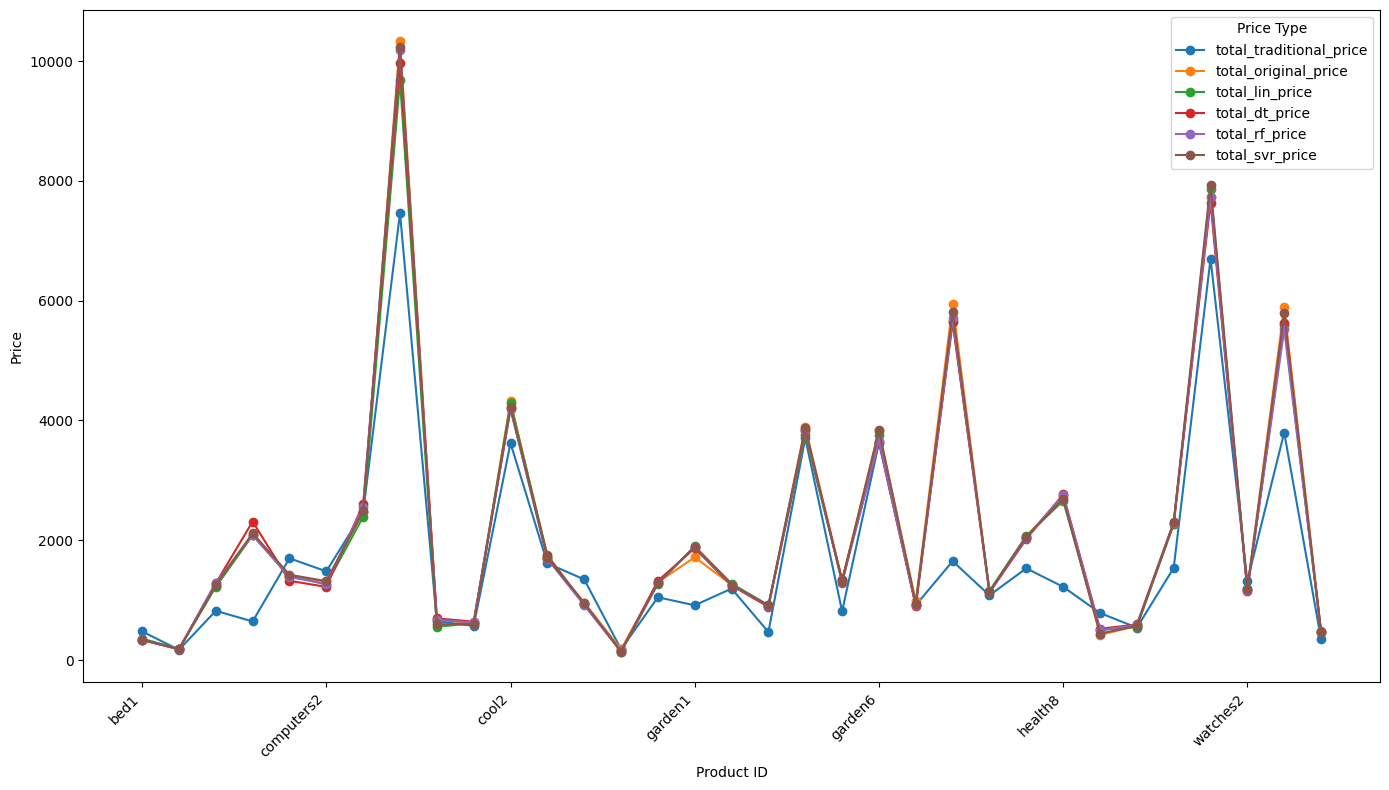

In [54]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load your data
# file_path = 'path_to_your_file/total_traditional_price.csv'
# data = pd.read_csv(file_path)

# Select the columns to be plotted
selected_columns = total_traditional_price[['product_id', 'total_traditional_price', 'total_original_price', 'total_rf_price']]

# Create the line chart
plt.figure(figsize=(12, 8))
total_traditional_price.set_index('product_id').plot(kind='line', marker='o', figsize=(14, 8))

# Adding labels and title
plt.xlabel('Product ID')
plt.ylabel('Price')
# plt.title('Comparison of Selected Prices for Each Product')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Type', loc='upper right')
plt.tight_layout()

# Display the plot
plt.savefig(base_path + "/comparative-line-chart.pdf", format="pdf", bbox_inches="tight")


<Figure size 1200x800 with 0 Axes>

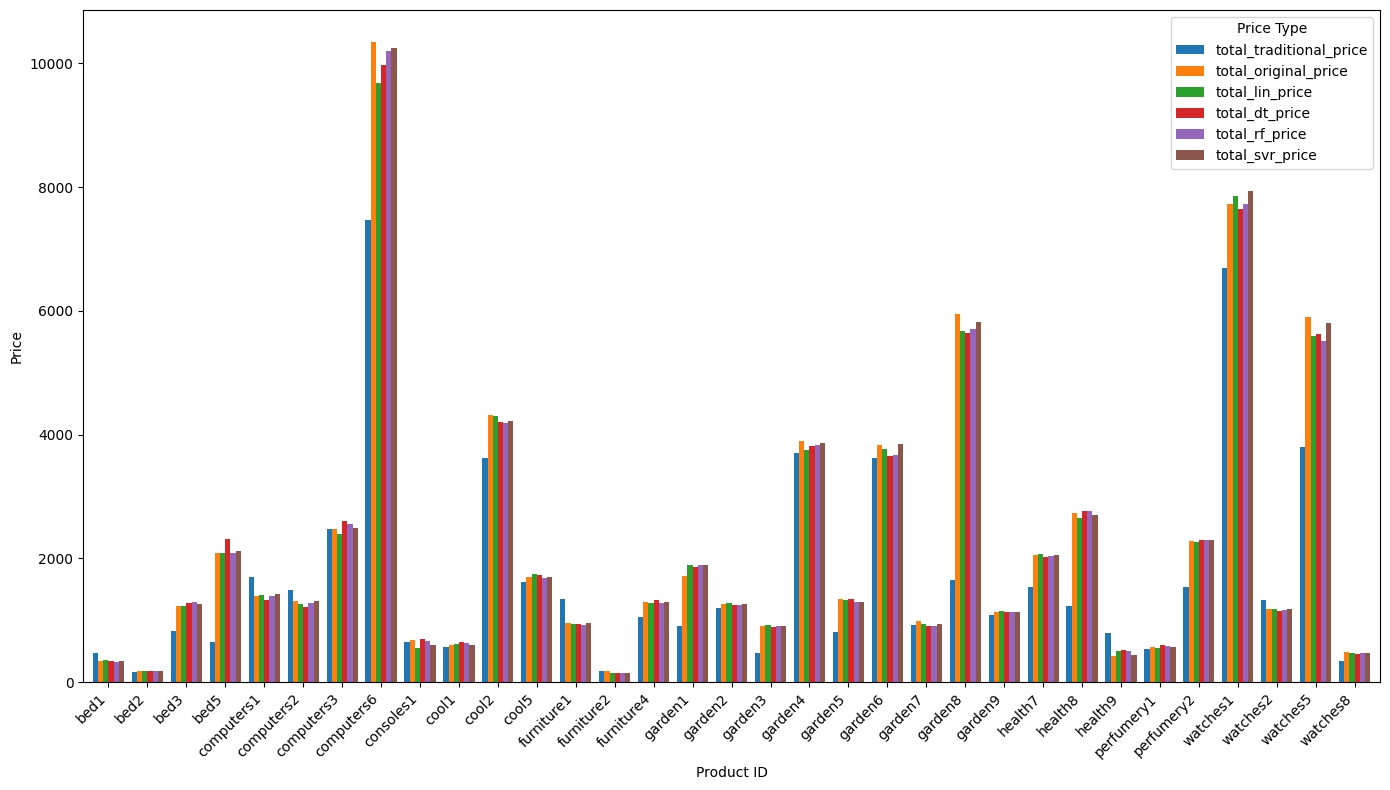

In [55]:

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
total_traditional_price.set_index('product_id').plot(kind='bar', width=0.8, figsize=(14, 8))

# Adding labels and title
plt.xlabel('Product ID')
plt.ylabel('Price')
# plt.title('Comparison of Prices Across Different Methods for Each Product')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Type', loc='upper right')
plt.tight_layout()

# Display the plot
plt.savefig(base_path + "/comparative-grouped-bar.pdf", format="pdf", bbox_inches="tight")
